## Probability Mass Functions Revisited with Claude.ai

### Simple example using Python to create and visualize a PMF for rolling a fair six-sided die

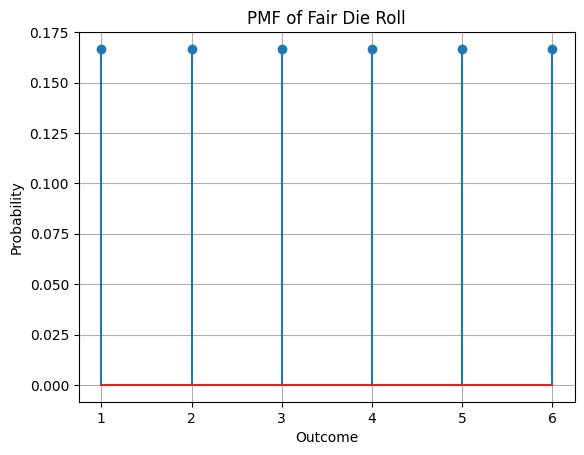

Sum of probabilities: 0.9999999999999999


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define possible values and their probabilities
values = np.array([1, 2, 3, 4, 5, 6])
probabilities = np.array([1/6] * 6)

# Plot PMF
plt.stem(values, probabilities)
plt.title('PMF of Fair Die Roll')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

# Verify probabilities sum to 1
print(f"Sum of probabilities: {sum(probabilities)}")

### Example that simulates 1000 die rolls and compares the empirical probabilities with the theoretical PMF

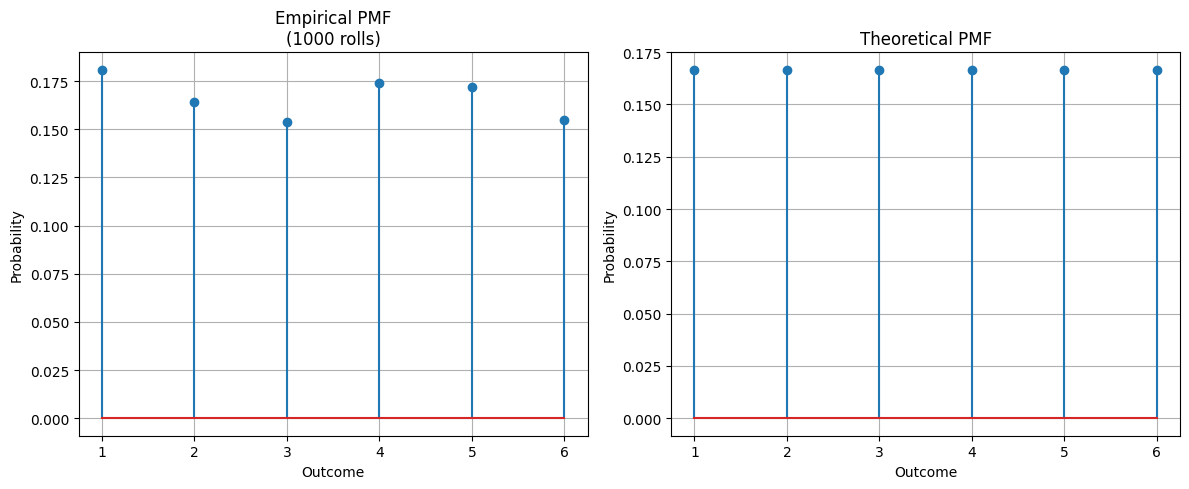

Empirical probabilities:
P(X = 1) = 0.181
P(X = 2) = 0.164
P(X = 3) = 0.154
P(X = 4) = 0.174
P(X = 5) = 0.172
P(X = 6) = 0.155


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# (1) Simulating 1000 rolls of a fair die using NumPy's random number generator
# Simulate 1000 die rolls
np.random.seed(42)  # For reproducibility
rolls = np.random.randint(1, 7, size=1000)

# (2) Calculating the empirical probabilities by counting the frequency of each outcome
# Calculate empirical probabilities
unique_values, counts = np.unique(rolls, return_counts=True)
empirical_probs = counts / len(rolls)

# Theoretical probabilities
theoretical_probs = np.array([1/6] * 6)

# (3) creating a side-by-side comparison of the empirical PMF (based on our simulation) and the theoretical PMF
# Create side-by-side plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot empirical PMF
ax1.stem(unique_values, empirical_probs)
ax1.set_title('Empirical PMF\n(1000 rolls)')
ax1.set_xlabel('Outcome')
ax1.set_ylabel('Probability')
ax1.grid(True)

# Plot theoretical PMF
ax2.stem(unique_values, theoretical_probs)
ax2.set_title('Theoretical PMF')
ax2.set_xlabel('Outcome')
ax2.set_ylabel('Probability')
ax2.grid(True)

plt.tight_layout()
plt.show()

# (4) printing the actual empirical probabilities
# Print the actual frequencies
print("Empirical probabilities:")
for value, prob in zip(unique_values, empirical_probs):
    print(f"P(X = {value}) = {prob:.3f}")

### Using the `empiricaldist` package to create a PMF from the simulated die rolls

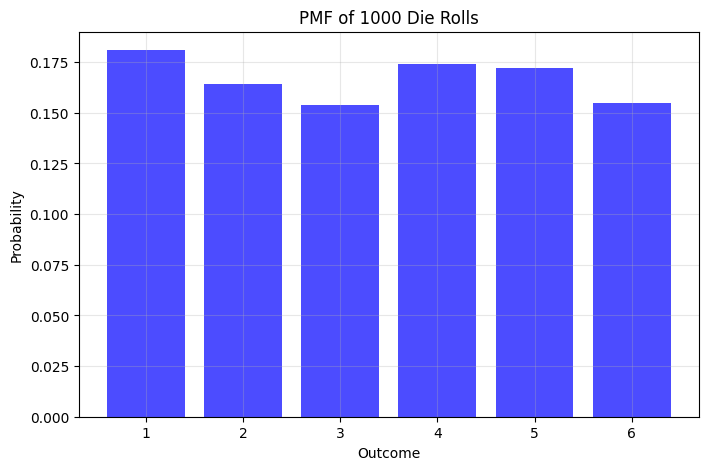

Empirical probabilities:
P(X = 1) = 0.181
P(X = 2) = 0.164
P(X = 3) = 0.154
P(X = 4) = 0.174
P(X = 5) = 0.172
P(X = 6) = 0.155


In [6]:
import numpy as np
from empiricaldist import Pmf
import matplotlib.pyplot as plt

# (1) Using numpy to simulate 1000 die rolls
# Simulate 1000 die rolls
np.random.seed(42)  # For reproducibility
rolls = np.random.randint(1, 7, size=1000)

# (2) creating a PMF using the Pmf.from_seq() method from empiricaldist
# Create PMF from the rolls
pmf = Pmf.from_seq(rolls)

# (3) creating bar plot with plt.bar() 
# the bar plot provides a clear visualization of the discrete probabilities, where:
# pmf.qs gives us the outcomes (1 through 6)
# pmf.ps gives us the corresponding probabilities
# some transparency gets added with alpha=0.7 and light grid lines for better readabilit
plt.figure(figsize=(8, 5))
plt.bar(pmf.qs, pmf.ps, width=0.8, color='blue', alpha=0.7)
plt.title('PMF of 1000 Die Rolls')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.grid(True, alpha=0.3)
plt.show()

# (4) printing the probability for each outcome
# Print the probabilities
print("Empirical probabilities:")
for value in sorted(pmf.qs):
    print(f"P(X = {value}) = {pmf[value]:.3f}")

### Demonstrating how PMFs can be used to analyze financial returns

__Example that analyzes daily stock returns using a PMF__. This example will help visualize the distribution of returns and identify how frequently different return ranges occur.

__Here's what this analysis shows__:

1. __Distribution Shape__: The PMF shows how frequently different return ranges occur, creating a histogram-like visualization that approximates a normal distribution (which is typical for financial returns).

2. __Key Features__:
   - The x-axis shows return ranges in percentage terms
   - The y-axis shows the probability of returns falling within each range
   - A tooltip appears on hover showing exact probabilities
   - Summary statistics show the proportion of positive vs negative returns

3. __Practical Applications__:
   - Risk Assessment: You can see how often extreme returns (positive or negative) occur
   - Investment Planning: Understanding the distribution helps set realistic return expectations
   - Portfolio Management: This can help in comparing different assets' return patterns

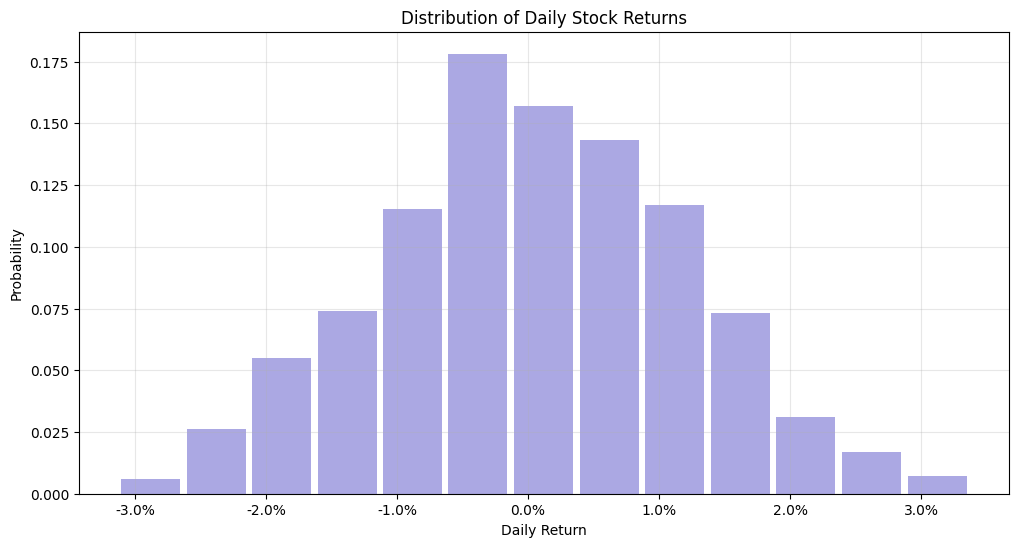


Summary Statistics:
Number of Observations: 1000
Most Common Return Range: -0.4%
Positive Returns: 49.8%
Negative Returns: 50.2%


In [7]:
import numpy as np
import pandas as pd
from empiricaldist import Pmf
import matplotlib.pyplot as plt

# (1) simulating 1000 daily returns using the a random generation method
# Simulate 1000 daily returns
np.random.seed(42)  # For reproducibility
# Using the same approach: mean = 0.0005 (0.05% daily return), std = 0.02 (2% daily volatility)
returns = np.sum([np.random.random(1000) for _ in range(4)], axis=0) - 2
returns = returns * 0.02 + 0.0005

# (2) creating bins for the continuous return data
# Create PMF from returns data
# First, we need to bin the data since returns are continuous
bin_size = 0.005  # 0.5% bins
bins = np.arange(min(returns), max(returns) + bin_size, bin_size)
# (3) using the empiricaldist.Pmf class to create the probability mass function
pmf = Pmf.from_seq(pd.cut(returns, bins))

# (4) plotting the distribution using matplotlib's bar plot
# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(
    [interval.mid for interval in pmf.qs],
    pmf.ps,
    width=bin_size*0.9,
    alpha=0.7,
    color='#8884d8'
)

# Customize the plot
plt.title('Distribution of Daily Stock Returns')
plt.xlabel('Daily Return')
plt.ylabel('Probability')
plt.grid(True, alpha=0.3)

# Format x-axis to show percentages
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.1f}%'))

plt.show()

# (5) calculating and printing the same summary statistics
# Print summary statistics
print("\nSummary Statistics:")
print(f"Number of Observations: {len(returns)}")
print(f"Most Common Return Range: {pmf.qs[np.argmax(pmf.ps)].mid*100:.1f}%")
print(f"Positive Returns: {(returns > 0).mean()*100:.1f}%")
print(f"Negative Returns: {(returns < 0).mean()*100:.1f}%")

#### __Having a closer look at how the returns are calculated__

This is an interesting way to generate approximately normally distributed returns. Let me break it down:

1. `[np.random.random(1000) for _ in range(4)]` creates 4 arrays, each with 1000 uniform random numbers between 0 and 1

2. `np.sum(..., axis=0)` adds these 4 arrays element-wise

3. `-2` is subtracted from the sum

4. The result is scaled by `0.02` and shifted by `0.0005`

This approach is based on the Central Limit Theorem and has some specific properties:

1. **Why sum 4 uniform distributions?**
   - Each uniform distribution has a mean of 0.5 and variance of 1/12
   - When you sum 4 of them, you get mean = 2 (which is why we subtract 2)
   - The sum approaches a normal distribution due to the Central Limit Theorem
   - Using 4 distributions gives a reasonable approximation of normality

2. **Why multiply by 0.02?**
   - This scales the returns to have a 2% standard deviation (volatility)
   - 2% daily volatility is a reasonable assumption for stock returns

3. **Why add 0.0005?**
   - This adds a 0.05% mean daily return
   - Represents a small positive expected return, typical for stocks

A more direct approach would be:
```python
returns = np.random.normal(loc=0.0005, scale=0.02, size=1000)
```

The chosen approach has some advantages:
- It's bounded (unlike a true normal distribution)
- It naturally produces a slightly leptokurtic distribution (fatter tails than normal)
- These properties actually make it more similar to real stock returns

However, for most applications, using `np.random.normal()` would be simpler and more explicit.

### Example using historical data from the S&P 500 ETF (SPY)

Analysis will be for the daily returns over the past 5 years.

In [10]:
import yfinance as yf
import numpy as np
import pandas as pd
from empiricaldist import Pmf
import matplotlib.pyplot as plt

In [12]:
# Download SPY data for the last 5 years
spy = yf.download('SPY', start='2019-01-01', end='2024-01-01')

[*********************100%***********************]  1 of 1 completed


In [16]:
spy

,Open,High,Low,Close
Date,,,,
2019-01-02,223.815956,228.574717,223.788660,227.637512
2019-01-03,225.863165,226.172540,221.714048,222.205399
2019-01-04,225.280818,230.303441,224.898664,229.648315
2019-01-07,229.921336,232.887588,229.011441,231.459061
2019-01-08,233.679209,234.125049,231.113299,233.633698
...,...,...,...,...
2023-12-22,467.858638,469.359407,465.726021,467.651306
2023-12-26,468.066000,470.544191,467.986997,469.625977
2023-12-27,469.418611,470.623161,468.875589,470.475067


In [11]:

# Calculate daily returns
daily_returns = spy['Adj Close'].pct_change().dropna()

# Create PMF from returns data
bin_size = 0.005  # 0.5% bins
bins = np.arange(min(daily_returns), max(daily_returns) + bin_size, bin_size)
pmf = Pmf.from_seq(pd.cut(daily_returns, bins))

# Create main plot
plt.figure(figsize=(15, 10))

# Create subplot for PMF
plt.subplot(2, 1, 1)
plt.bar(
    [interval.mid for interval in pmf.qs],
    pmf.ps,
    width=bin_size*0.9,
    alpha=0.7,
    color='#0066cc'
)

plt.title('Distribution of SPY Daily Returns (2019-2024)')
plt.xlabel('Daily Return')
plt.ylabel('Probability')
plt.grid(True, alpha=0.3)

# Format x-axis to show percentages
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.1f}%'))

# Create subplot for cumulative returns
plt.subplot(2, 1, 2)
cumulative_returns = (1 + daily_returns).cumprod()
plt.plot(cumulative_returns.index, cumulative_returns, color='#0066cc')
plt.title('Cumulative Returns of SPY (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(f"Number of Trading Days: {len(daily_returns)}")
print(f"Mean Daily Return: {daily_returns.mean()*100:.2f}%")
print(f"Daily Return Std Dev: {daily_returns.std()*100:.2f}%")
print(f"Most Common Return Range: {pmf.qs[np.argmax(pmf.ps)].mid*100:.1f}%")
print(f"Positive Returns: {(daily_returns > 0).mean()*100:.1f}%")
print(f"Negative Returns: {(daily_returns < 0).mean()*100:.1f}%")
print(f"\nExtreme Returns:")
print(f"Best Day: {daily_returns.max()*100:.1f}% ({daily_returns.idxmax().strftime('%Y-%m-%d')})")
print(f"Worst Day: {daily_returns.min()*100:.1f}% ({daily_returns.idxmin().strftime('%Y-%m-%d')})")
print(f"\nTotal Return: {(cumulative_returns[-1] - 1)*100:.1f}%")

[*********************100%***********************]  1 of 1 completed


KeyError: 'Adj Close'

[*********************100%***********************]  1 of 1 completed


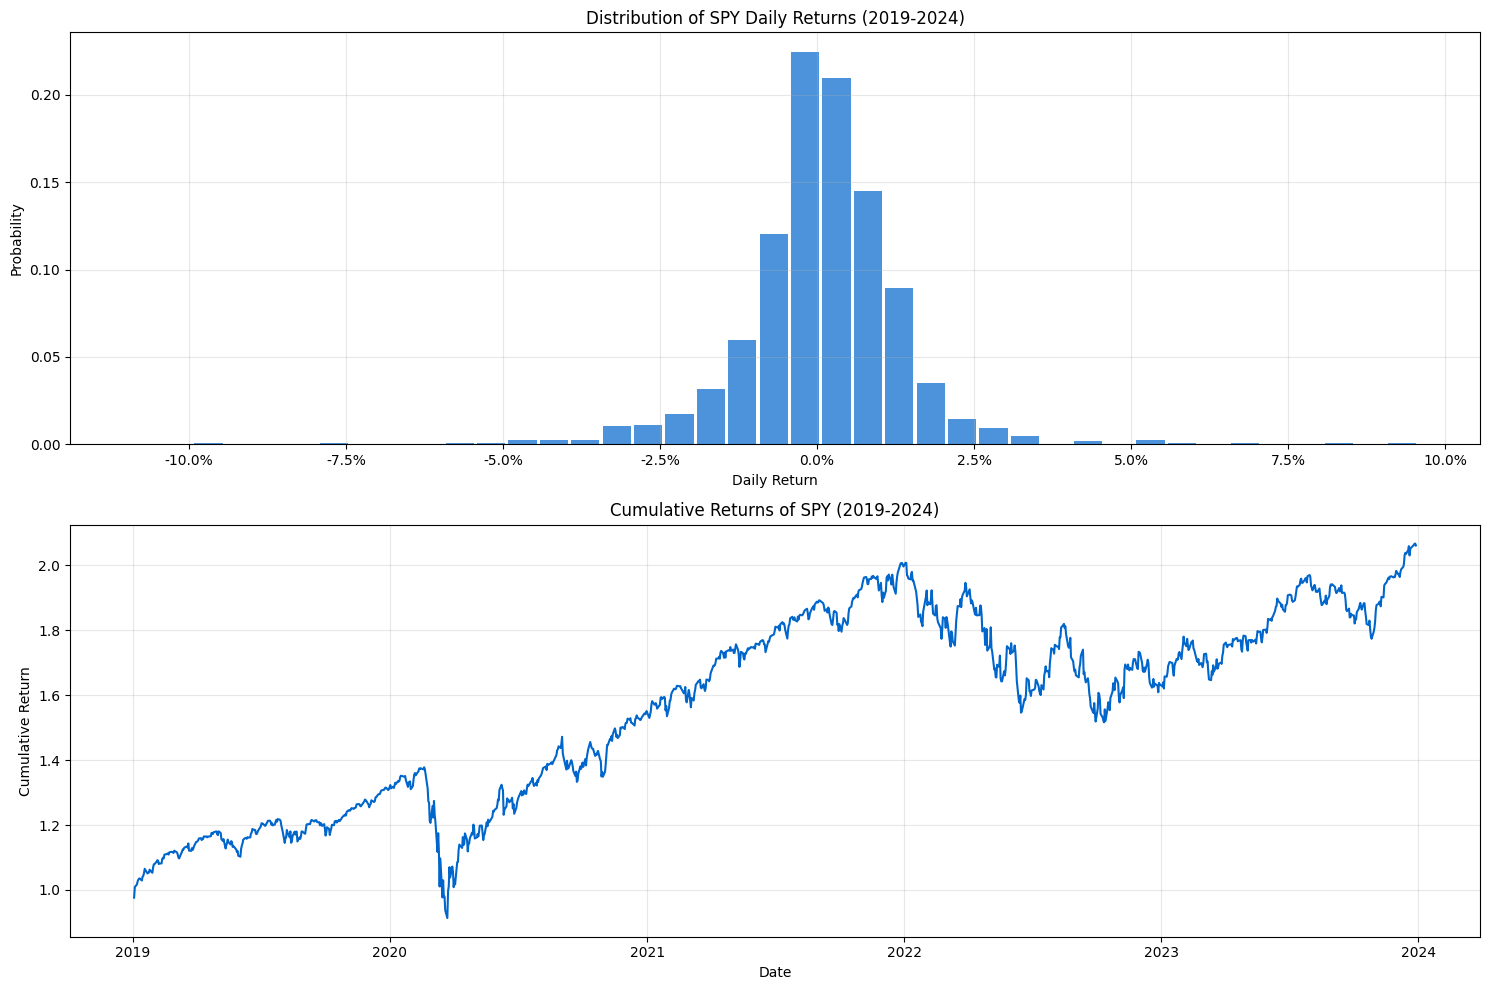


Summary Statistics:
Number of Trading Days: 1257
Mean Daily Return: 0.07%
Daily Return Std Dev: 1.32%
Most Common Return Range: -0.2%
Positive Returns: 54.9%
Negative Returns: 44.9%

Extreme Returns:
Best Day: 9.1% (2020-03-24)
Worst Day: -10.9% (2020-03-16)

Total Return: 106.2%


/var/folders/7c/6tn50bjd30l3zb0p8_7mr94m0000gn/T/ipykernel_98599/3339385550.py:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nTotal Return: {(cumulative_returns[-1] - 1)*100:.1f}%")


In [18]:
import yfinance as yf
import numpy as np
import pandas as pd
from empiricaldist import Pmf
import matplotlib.pyplot as plt

# Download SPY data for the last 5 years
spy_raw = yf.download('SPY', start='2019-01-01', end='2024-01-01')

# Convert MultiIndex to single index with appropriate column names
spy = pd.DataFrame()
spy['Open'] = spy_raw['Open']
spy['High'] = spy_raw['High']
spy['Low'] = spy_raw['Low']
spy['Close'] = spy_raw['Close']
spy['Volume'] = spy_raw['Volume']

# Calculate daily returns using Close price
daily_returns = spy['Close'].pct_change().dropna()

# Create PMF from returns data
bin_size = 0.005  # 0.5% bins
bins = np.arange(min(daily_returns), max(daily_returns) + bin_size, bin_size)
pmf = Pmf.from_seq(pd.cut(daily_returns, bins))

# Create main plot
plt.figure(figsize=(15, 10))

# Create subplot for PMF
plt.subplot(2, 1, 1)
plt.bar(
    [interval.mid for interval in pmf.qs],
    pmf.ps,
    width=bin_size*0.9,
    alpha=0.7,
    color='#0066cc'
)

plt.title('Distribution of SPY Daily Returns (2019-2024)')
plt.xlabel('Daily Return')
plt.ylabel('Probability')
plt.grid(True, alpha=0.3)

# Format x-axis to show percentages
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.1f}%'))

# Create subplot for cumulative returns
plt.subplot(2, 1, 2)
cumulative_returns = (1 + daily_returns).cumprod()
plt.plot(cumulative_returns.index, cumulative_returns, color='#0066cc')
plt.title('Cumulative Returns of SPY (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(f"Number of Trading Days: {len(daily_returns)}")
print(f"Mean Daily Return: {daily_returns.mean()*100:.2f}%")
print(f"Daily Return Std Dev: {daily_returns.std()*100:.2f}%")
print(f"Most Common Return Range: {pmf.qs[np.argmax(pmf.ps)].mid*100:.1f}%")
print(f"Positive Returns: {(daily_returns > 0).mean()*100:.1f}%")
print(f"Negative Returns: {(daily_returns < 0).mean()*100:.1f}%")
print(f"\nExtreme Returns:")
print(f"Best Day: {daily_returns.max()*100:.1f}% ({daily_returns.idxmax().strftime('%Y-%m-%d')})")
print(f"Worst Day: {daily_returns.min()*100:.1f}% ({daily_returns.idxmin().strftime('%Y-%m-%d')})")
print(f"\nTotal Return: {(cumulative_returns[-1] - 1)*100:.1f}%")

[*********************100%***********************]  1 of 1 completed


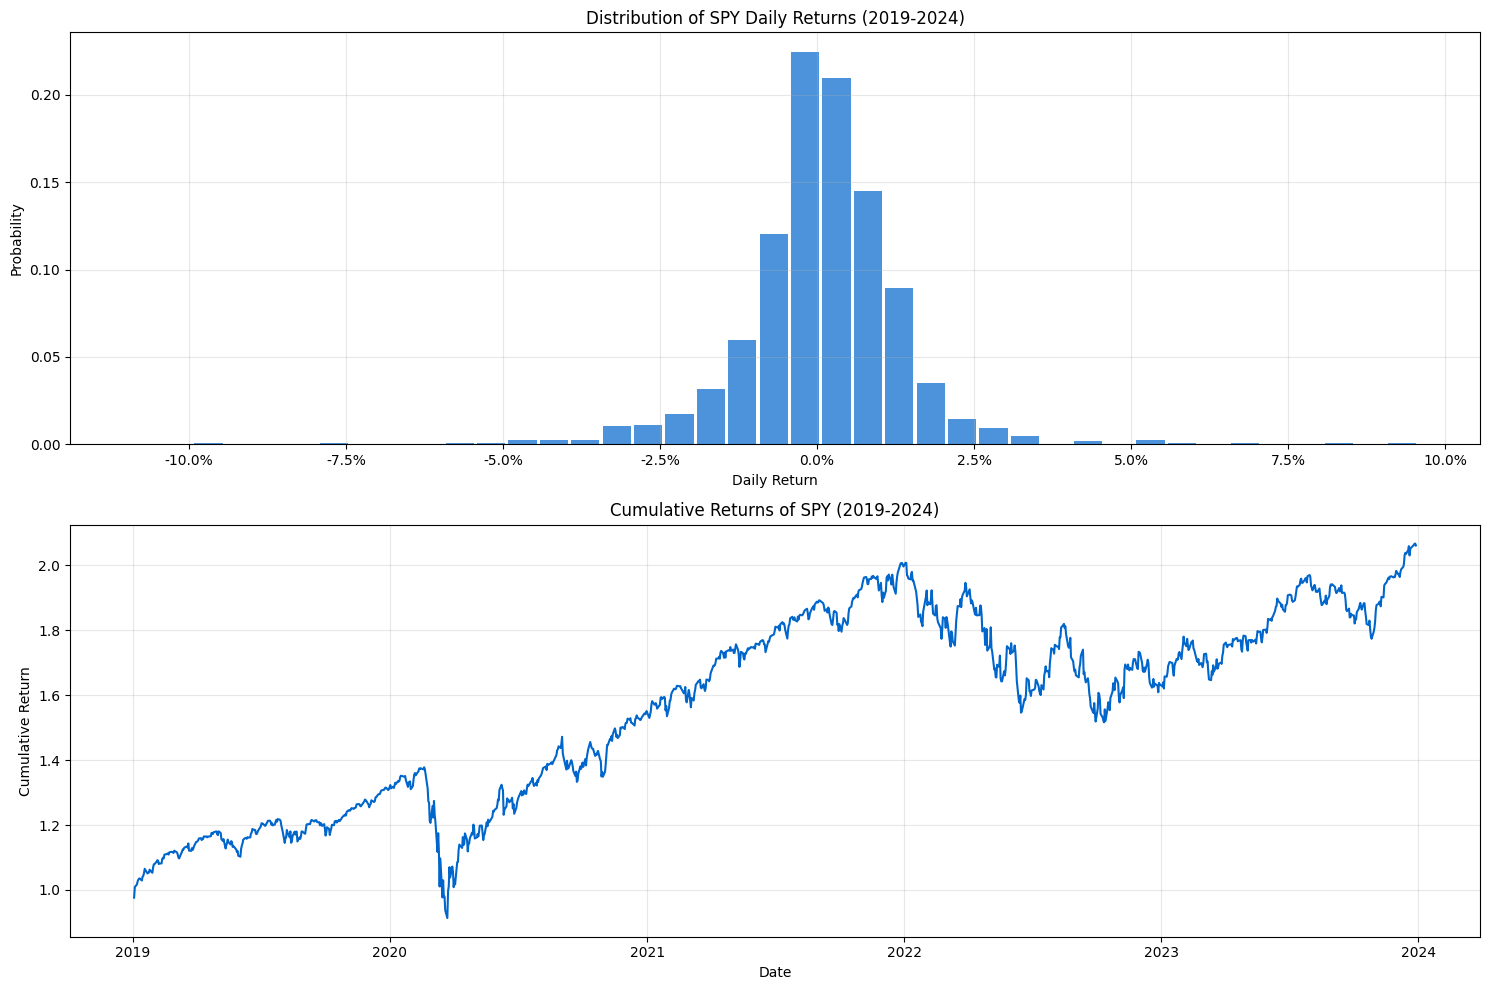


Summary Statistics:
Number of Trading Days: 1257
Mean Daily Return: 0.07%
Daily Return Std Dev: 1.32%
Most Common Return Range: -0.2%
Positive Returns: 54.9%
Negative Returns: 44.9%

Extreme Returns:
Best Day: 9.1% (2020-03-24)
Worst Day: -10.9% (2020-03-16)

Total Return: 106.2%


/var/folders/7c/6tn50bjd30l3zb0p8_7mr94m0000gn/T/ipykernel_98599/3339385550.py:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nTotal Return: {(cumulative_returns[-1] - 1)*100:.1f}%")


In [19]:
import yfinance as yf
import numpy as np
import pandas as pd
from empiricaldist import Pmf
import matplotlib.pyplot as plt

# Download SPY data for the last 5 years
spy_raw = yf.download('SPY', start='2019-01-01', end='2024-01-01')

# Convert MultiIndex to single index with appropriate column names
spy = pd.DataFrame()
spy['Open'] = spy_raw['Open']
spy['High'] = spy_raw['High']
spy['Low'] = spy_raw['Low']
spy['Close'] = spy_raw['Close']
spy['Volume'] = spy_raw['Volume']

# Calculate daily returns using Close price
daily_returns = spy['Close'].pct_change().dropna()

# Create PMF from returns data
bin_size = 0.005  # 0.5% bins
bins = np.arange(min(daily_returns), max(daily_returns) + bin_size, bin_size)
pmf = Pmf.from_seq(pd.cut(daily_returns, bins))

# Create main plot
plt.figure(figsize=(15, 10))

# Create subplot for PMF
plt.subplot(2, 1, 1)
plt.bar(
    [interval.mid for interval in pmf.qs],
    pmf.ps,
    width=bin_size*0.9,
    alpha=0.7,
    color='#0066cc'
)

plt.title('Distribution of SPY Daily Returns (2019-2024)')
plt.xlabel('Daily Return')
plt.ylabel('Probability')
plt.grid(True, alpha=0.3)

# Format x-axis to show percentages
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.1f}%'))

# Create subplot for cumulative returns
plt.subplot(2, 1, 2)
cumulative_returns = (1 + daily_returns).cumprod()
plt.plot(cumulative_returns.index, cumulative_returns, color='#0066cc')
plt.title('Cumulative Returns of SPY (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(f"Number of Trading Days: {len(daily_returns)}")
print(f"Mean Daily Return: {daily_returns.mean()*100:.2f}%")
print(f"Daily Return Std Dev: {daily_returns.std()*100:.2f}%")
print(f"Most Common Return Range: {pmf.qs[np.argmax(pmf.ps)].mid*100:.1f}%")
print(f"Positive Returns: {(daily_returns > 0).mean()*100:.1f}%")
print(f"Negative Returns: {(daily_returns < 0).mean()*100:.1f}%")
print(f"\nExtreme Returns:")
print(f"Best Day: {daily_returns.max()*100:.1f}% ({daily_returns.idxmax().strftime('%Y-%m-%d')})")
print(f"Worst Day: {daily_returns.min()*100:.1f}% ({daily_returns.idxmin().strftime('%Y-%m-%d')})")
print(f"\nTotal Return: {(cumulative_returns[-1] - 1)*100:.1f}%")